In [2]:
#****Task 2 & Book_Maker: 10Bet******

import numpy as np
import pandas as pd
from pandas import DataFrame
import csv
from matplotlib import pyplot as plt
bets=pd.read_csv('C:\\Users\\MERT\\Desktop\\Dersler\\Data Mining\\Veriler\\bets.csv')
matches=pd.read_csv('C:\\Users\\MERT\\Desktop\\Dersler\\Data Mining\\Veriler\\matches.csv')

In [3]:
Second_Book_Maker=bets[bets.odd_bookmakers=='10Bet'] #second bookmaker is =10Bet
Home_Win_List=Second_Book_Maker[Second_Book_Maker.variable=='odd_1'] #home, away and draft win filtered seperately
Away_Win_List=Second_Book_Maker[Second_Book_Maker.variable=='odd_2']
Draft_List=Second_Book_Maker[Second_Book_Maker.variable=='odd_x']
Premier_League=matches[matches.league_id==148]

In [4]:
data= pd.merge(Home_Win_List,Away_Win_List,on='match_id',how='inner') #firstly merge home and away win for a match
data_1=pd.merge(data,Premier_League,on='match_id',how='inner') #secondly with merge premier league match to eliminate others

In [5]:
data_2=pd.merge(data_1,Draft_List,on='match_id',how='inner') #finally draft merged to data

In [6]:
data_2['Prob_Home']=1/(data_2['value_x'])  #probability of home team win

In [7]:
data_2['Prob_Away']=1/(data_2['value_y'])  #probability of away team win

In [8]:
data_2['Prob_Draft']=1/(data_2['value'])   #probability of draft

In [9]:
Norm_Home=(data_2['Prob_Home'])/(data_2['Prob_Home']+data_2['Prob_Away']+data_2['Prob_Draft']) #normalization
Norm_Away=(data_2['Prob_Away'])/(data_2['Prob_Home']+data_2['Prob_Away']+data_2['Prob_Draft']) 
Norm_Draft=(data_2['Prob_Draft'])/(data_2['Prob_Home']+data_2['Prob_Away']+data_2['Prob_Draft'])
match_id=data_2['match_id']
norm_bet={'match_id':match_id,
         'Norm_Home':Norm_Home,
         'Norm_Away':Norm_Away,
         'Norm_Draft':Norm_Draft}


In [10]:
norm_prob= DataFrame(norm_bet,columns=['match_id','Norm_Home', 'Norm_Away', 'Norm_Draft'])
print(norm_prob)

     match_id  Norm_Home  Norm_Away  Norm_Draft
0      150842   0.693895   0.112656    0.193449
1      150843   0.596076   0.169855    0.234069
2      150844   0.704698   0.112752    0.182550
3      154513   0.318725   0.382470    0.298805
4      154516   0.682858   0.115879    0.201263
5      154517   0.150896   0.626269    0.222835
6      154518   0.078273   0.767075    0.154652
7      154519   0.342282   0.375839    0.281879
8      155388   0.273728   0.467340    0.258932
9      156200   0.324020   0.367638    0.308342
10     156845   0.607656   0.149282    0.243062
11     156847   0.421094   0.282824    0.296082
12     156848   0.854665   0.048034    0.097300
13     156849   0.380415   0.322386    0.297199
14     156850   0.223718   0.508450    0.267832
15     158697   0.320957   0.363348    0.315695
16     158699   0.098742   0.729342    0.171916
17     158538   0.081812   0.751007    0.167181
18     158539   0.633084   0.136565    0.230351
19     158541   0.178020   0.562168    0

In [11]:
x=data_2['Prob_Home']-data_2['Prob_Away']

In [12]:
y=data_2['Prob_Draft']

Text(0.5,1,'10Bet')

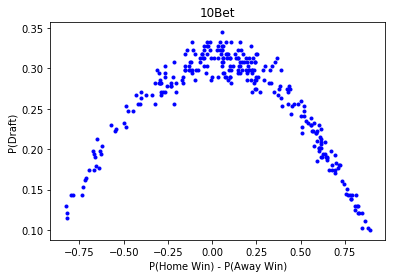

In [13]:
plt.plot(x,y,'.',color='blue')
plt.xlabel('P(Home Win) - P(Away Win)')
plt.ylabel('P(Draft)')
plt.title('10Bet')

In [14]:
data_2['dif']=data_2['Prob_Home']-data_2['Prob_Away']

In [15]:
data_3=pd.merge(data_2,matches,on='match_id',how='inner') #merging the match score and probabilities with respect to match_id

In [16]:
draft_matches = data_3[data_3.match_hometeam_score_y == data_3.match_awayteam_score_y] #filtering only draft matches
a = np.histogram(draft_matches['dif'], bins=np.arange(-1, 1.1, 0.1))[0]  #defining bins with 0,1 and calculating the draft matches in these bins

In [17]:
b = np.histogram(data_3['dif'], bins=np.arange(-1, 1.1, 0.1))[0] #calculating all matches in these bins
for index in range(len(b)):
    if b[index]==0:                        #preventing 0/0, dont affect the result 
        b[index]=1
    

In [18]:
actual_prob_draft=np.true_divide(a, b)  #real draft match rates


Text(0.5,1,'10Bet')

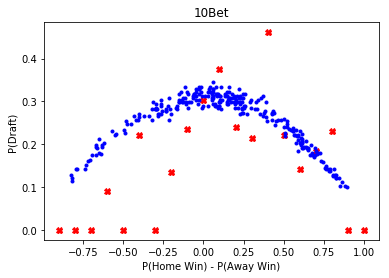

In [19]:
plt.plot(np.arange(-0.9,1.1,0.1),actual_prob_draft,'X',color='red')
plt.plot(x,y,'.',color='blue')
plt.xlabel('P(Home Win) - P(Away Win)')
plt.ylabel('P(Draft)')
plt.title('10Bet')

In [19]:
#Comment: There is no bias in odds representing the probabilities.